In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Collecting Data

## I have uploaded the agriculture data excel file in my colab (Upload to session storage)

In [ ]:
data = pd.read_excel('agricultue_data.xlsx')

In [ ]:
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26


In [ ]:
data.tail()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1822,1823,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,2020-01-06
1823,1824,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,2020-01-05
1824,1825,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-01-04
1825,1826,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-01-02
1826,1827,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020-01-01


In [ ]:
data.shape

(1827, 10)

In [ ]:
data['Market Name'].unique()

array(['Achnera', 'Agra', 'Fatehabad', 'Fatehpur Sikri', 'Jagnair',
       'Jarar', 'Khairagarh', 'Samsabad'], dtype=object)

In [ ]:
data['Market Name'].value_counts()

Achnera           306
Fatehpur Sikri    290
Agra              285
Fatehabad         258
Jagnair           187
Khairagarh        187
Samsabad          168
Jarar             146
Name: Market Name, dtype: int64

In [ ]:
data['Grade'].unique()

array(['FAQ'], dtype=object)

In [ ]:
data['Commodity'].unique()

array(['Potato'], dtype=object)

In [ ]:
data['Variety'].unique()

array(['Desi', 'Potato', 'Local', 'Other'], dtype=object)

# Identify major markets for the district “Agra” and plot price patterns for each of them.

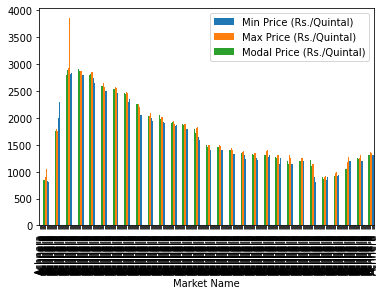

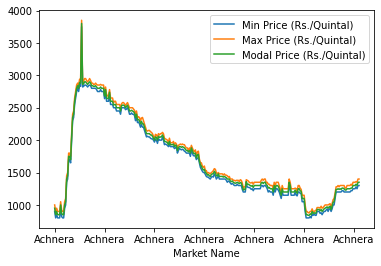

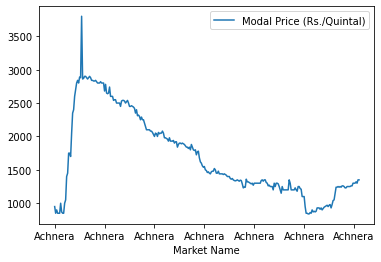

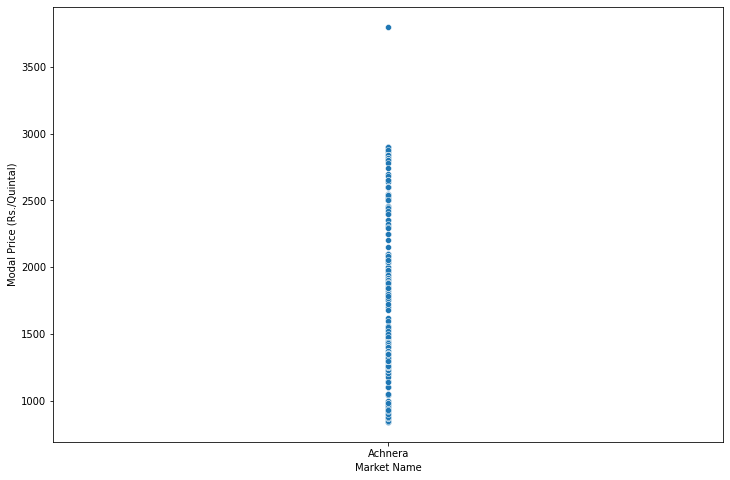

In [ ]:
df1 = data[data['Market Name']=='Achnera']
# plt.figure(figsize=(10,5))
df1.plot(x='Market Name',y=['Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','Modal Price (Rs./Quintal)'],kind='bar')
df1.plot(x='Market Name',y=['Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','Modal Price (Rs./Quintal)'])
df1.plot(x='Market Name',y='Modal Price (Rs./Quintal)')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Market Name',y='Modal Price (Rs./Quintal)',data=df1)


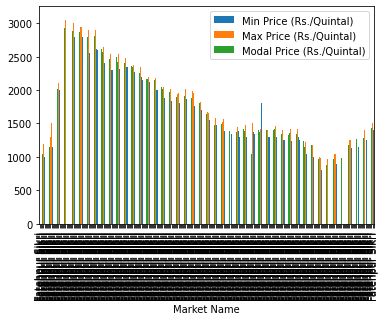

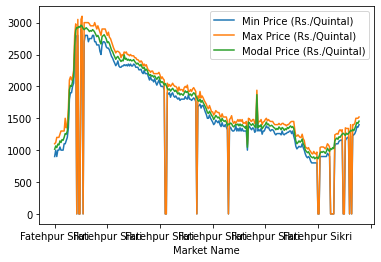

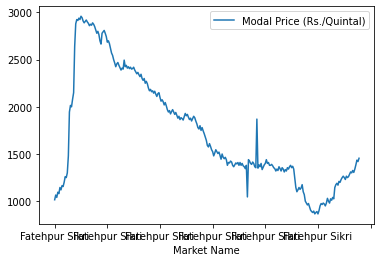

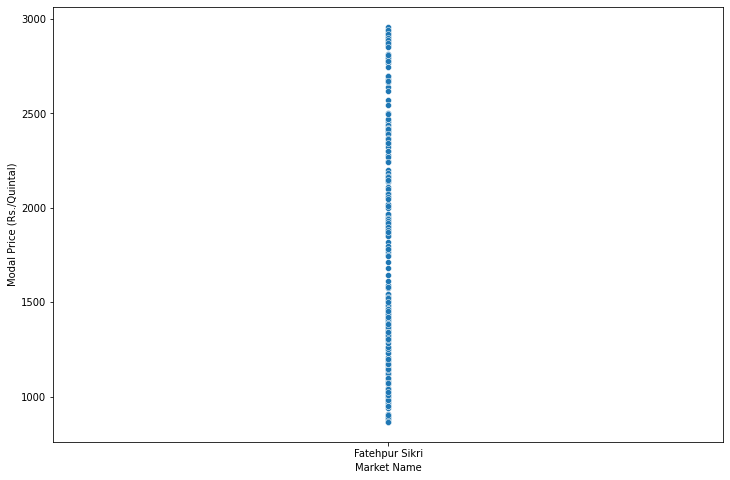

In [ ]:
df1 = data[data['Market Name']=='Fatehpur Sikri']
# plt.figure(figsize=(10,5))
df1.plot(x='Market Name',y=['Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','Modal Price (Rs./Quintal)'],kind='bar')
df1.plot(x='Market Name',y=['Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','Modal Price (Rs./Quintal)'])
df1.plot(x='Market Name',y='Modal Price (Rs./Quintal)')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Market Name',y='Modal Price (Rs./Quintal)',data=df1)


In [ ]:
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26


# Data Cleaning

In [ ]:
data.drop('District Name',inplace=True,axis=1)

In [ ]:
data.drop('Grade',inplace=True,axis=1)

In [ ]:
data.drop('Commodity',inplace=True,axis=1)

In [ ]:
data.drop('Sl no.',inplace=True,axis=1)

In [ ]:
data.drop('Price Date',inplace=True,axis=1)

# The features of the data are Market Name, Variety, Min Price (Rs./Quintal),	Max Price (Rs./Quintal)  and target variable is  Modal Price (Rs./Quintal)

In [ ]:
data.head()

,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,Achnera,Desi,900,1000,950
1,Achnera,Desi,800,900,850
2,Achnera,Desi,850,950,900
3,Achnera,Desi,800,900,850
4,Achnera,Desi,800,900,850


In [ ]:
data.isnull().sum()

Market Name                  0
Variety                      0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
dtype: int64

In [ ]:
data1 = data.copy()

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in data1.columns[0:len(data1.columns)] :
    le = LabelEncoder()
    data1[column] = le.fit_transform(data1[column])

# Label Encoder Purpose -> In machine learning, we usually deal with datasets that contain multiple labels in one or more than one column. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labeled in words. 
# Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. 

In [ ]:
data1.head(10)

,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,0,0,22,25,30
1,0,0,13,17,16
2,0,0,18,21,24
3,0,0,13,17,16
4,0,0,13,17,16
5,0,0,13,17,16
6,0,0,26,29,37
7,0,0,15,19,20
8,0,0,13,17,16
9,0,0,13,17,16


In [ ]:
data1['Market Name'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
le1=LabelEncoder()
le1.fit_transform(data['Market Name'])
le1.inverse_transform(data1['Market Name'].unique())

array(['Achnera', 'Agra', 'Fatehabad', 'Fatehpur Sikri', 'Jagnair',
       'Jarar', 'Khairagarh', 'Samsabad'], dtype=object)

# Label Encoder can inverse transform also so that you can know that what are the values to be entered for prediction as the label for that value is present already

In [ ]:
data1['Variety'].unique()

array([0, 3, 1, 2])

In [ ]:
le2=LabelEncoder()
le2.fit_transform(data['Variety'])
le2.inverse_transform(data1['Variety'].unique())

array(['Desi', 'Potato', 'Local', 'Other'], dtype=object)

# Check for any null values present or not

In [ ]:
data1.isnull().sum()

Market Name                  0
Variety                      0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
dtype: int64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split


X = data1.drop(columns='Modal Price (Rs./Quintal)', axis=1)
Y = data1['Modal Price (Rs./Quintal)']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

# I am first testing with linear regression because our prediction will be different values not only binary classification problem like 0 or 1.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model1.intercept_

-5.5260651456432015

In [ ]:
model1.coef_

array([-0.56948516,  7.95633042,  1.44073654,  0.4540512 ])

# Scatter plot for Linear Regression to check the regression line

In [ ]:
from sklearn.metrics import accuracy_score
x_test_prediction = model1.predict(x_test)
# testing_data_accuracy = model1.score(x_test_prediction, y_test)

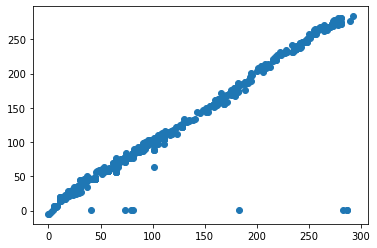

In [ ]:
plt.scatter(y_test,x_test_prediction)

# Loss function for Linear Regression

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, x_test_prediction))
print('MSE:', metrics.mean_squared_error(y_test, x_test_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, x_test_prediction)))

MAE: 5.493539638718361
MSE: 426.7885336160831
RMSE: 20.658860898318743


# We will try for Random Forest Classifier also

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
x_test_prediction2 = model2.predict(x_test)
test_data_accuracy2 = accuracy_score(x_test_prediction2, y_test)

# Accuracy Score for Random Forest Classifier

In [ ]:
print('Accuracy on Test data using Random Forest Classifier : ', test_data_accuracy2*100)

Accuracy on Test data using Random Forest Classifier :  63.20109439124487


# Training using Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=101)
model3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [ ]:
x_test_prediction3 = model3.predict(x_test)
test_data_accuracy3 = accuracy_score(x_test_prediction3, y_test)

# Accuracy Score for Decision Tree Classifier

In [ ]:
print('Accuracy on Test data using Decision Tree Classifier : ', test_data_accuracy3*100)

Accuracy on Test data using Decision Tree Classifier :  63.748290013679885


In [ ]:
x_test.values

array([[ 7,  1, 22, 33],
       [ 0,  0, 92, 93],
       [ 7,  1, 34, 46],
       ...,
       [ 2,  0, 42, 46],
       [ 6,  0, 28, 33],
       [ 0,  0, 22, 22]])

# Predicting the new data using Linear Regression

In [ ]:
# Achnera = 0, Desi = 0, min price = 13 , max price= 17
prediction = model1.predict(np.array([[0,0,13,17]]))

In [ ]:
print("predicted rate of crop of potato is ",prediction[0])

predicted rate of crop of potato is  20.922380269119483
